In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("used_cars.xls")

In [10]:
data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [12]:
data.shape

(10000, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [51]:
cont_vars = ['mileage_kmpl','engine_cc','owner_count','accidents_reported']
cat_vars = ['fuel_type','brand','transmission','color','service_history','insurance_valid']

### Missing values

In [13]:
data.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [14]:
data['service_history'].value_counts()

service_history
Full       4987
Partial    2975
Name: count, dtype: int64

In [16]:
data['service_history'].fillna(data['service_history'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13968\862835138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service_history'].fillna(data['service_history'].mode()[0], inplace=True)


In [17]:
data.isnull().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [56]:
cat_vars = ['fuel_type','brand','transmission','color','service_history','insurance_valid']

for i in cat_vars:
    print('\n')
    print(data[i].value_counts())



fuel_type
Petrol      4968
Diesel      4058
Electric     974
Name: count, dtype: int64


brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64


transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64


color
Gray      1705
Black     1702
Red       1678
White     1651
Blue      1634
Silver    1630
Name: count, dtype: int64


service_history
Full       7025
Partial    2975
Name: count, dtype: int64


insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64


### Target variable

<Axes: xlabel='price_usd', ylabel='Count'>

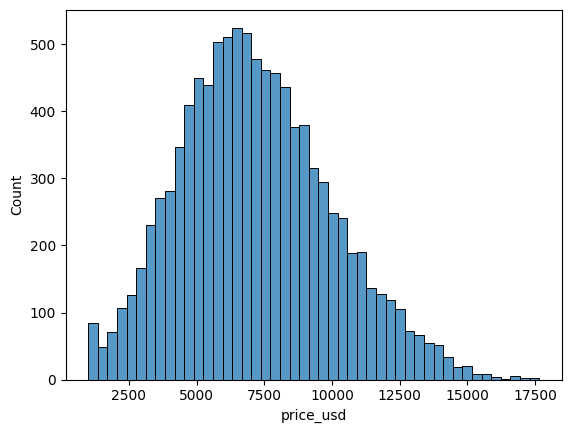

In [28]:
sns.histplot(x=data['price_usd'])

### Correlation

In [31]:
data[['mileage_kmpl','engine_cc','owner_count','accidents_reported','price_usd']].corr()

,mileage_kmpl,engine_cc,owner_count,accidents_reported,price_usd
mileage_kmpl,1.000000,-0.003222,-0.008310,0.004567,0.211971
engine_cc,-0.003222,1.000000,-0.000358,-0.007750,0.678161
owner_count,-0.008310,-0.000358,1.000000,-0.009365,-0.262266
accidents_reported,0.004567,-0.007750,-0.009365,1.000000,-0.001461
price_usd,0.211971,0.678161,-0.262266,-0.001461,1.000000


## Drop columns

In [60]:
data  = data.drop(['accidents_reported'], axis=1)

In [61]:
data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,Yes


## Encoding variables

In [63]:
data = pd.get_dummies(data)

In [65]:
data.shape

(10000, 30)

## Split data

In [74]:
X = data.drop('price_usd',axis = 1)
y = data['price_usd']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [77]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.4f}\n")
    

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

lr = LinearRegression()
dt = DecisionTreeClassifier()
bc = BaggingClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svr = SVR()

models = ['lr','dt','bc','ada','rf','xgb','svr']

for i in models:
    model_acc(i)
